### Jonathan Bunch

10 October 2021

Bellevue University

DSC550-T301

---

# Case Study: Analyze data to predict who will Survive the Titanic

## 1. Load the data from the “train.csv” file into a DataFrame.

In [2]:
# Import libraries.
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D

# Load data set.
titanic_raw = pd.read_csv("train.csv")

## 2. Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with.)

In [3]:
# Just to practice different methods, I will try unpacking the shape parameter values directly into string formatting.
print("Number of Rows: {} \nNumber of Columns: {}".format(*titanic_raw.shape))

Number of Rows: 891 
Number of Columns: 12


## 3. Display the first 5 rows of data so you can see the column headings and the type of data for each column.
### a.Notice that Survived is represented as a 1 or 0
### b.Notice that missing data is represented as “NaN”
### c.The Survived variable will be the “target” and the other variables will be the “features”

In [4]:
titanic_raw.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4. Think about some questions that might help you predict who will survive:
###  a. What do the variables look like? For example, are they numerical or categorical data.If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?
###  b. Are the numerical variables correlated?
###  c. Are the distributions of numerical variables the same or different among survived and not survived? Is the survival rate different for different values? For example, were people more likely to survive if they were younger?
###  d. Are there different survival rates in different categories? For example, did more women survived than man?

The info() method gives us a basic overview of the data types and NA counts for each variable.  We will explore these
variables and questions in more detail as we move forward.

In [5]:
# Use the info() method to display the data type and non-null count for each variable.
titanic_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 5. Look at summary information about your data (total, mean, min, max, freq, unique, etc.) Does this present any more questions for you?  Does it lead you to a conclusion yet?

The summary statistics do reveal some useful information.  For example, we can see that the max and min values for our variables look to be within the expected ranges, and that "Age" has quite a few missing values.

In [6]:
titanic_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 6. Make some histograms of your data (“A picture is worth a thousand words!”)
### a.Most of the passengers are around 20 to 30 years old and don't have siblings or relatives with them. A large amount of the tickets sold were less than 50 dollars. There are very few tickets sold where the fare was over $500.

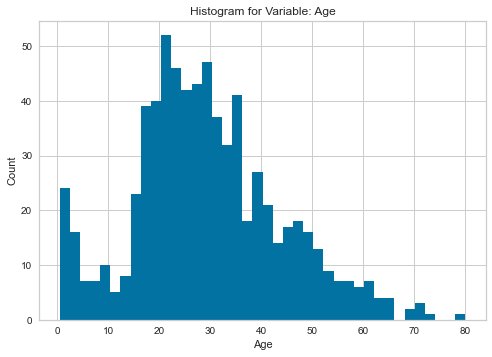

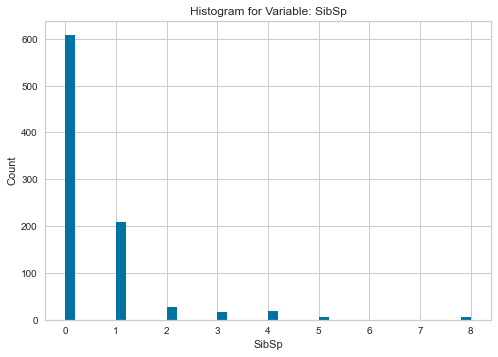

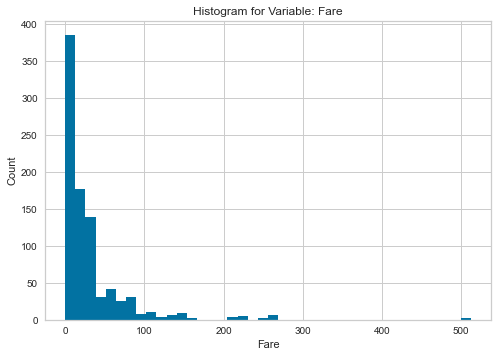

In [7]:
# First, I will make a list of the variable names for some of the numerical variables.
num_vars = ['Age', 'SibSp', 'Fare']

# Now I will create a histogram for each of the variables in the list.
for col in num_vars:
    titanic_raw[col].hist(bins=40)
    plt.title("Histogram for Variable: {}".format(col))
    plt.xlabel("{}".format(col))
    plt.ylabel("Count")
    plt.show()

## 7. Make some bar charts for variables with only a few options.
### a. Ticket and Cabin have more than 100 variables so don’t do those!

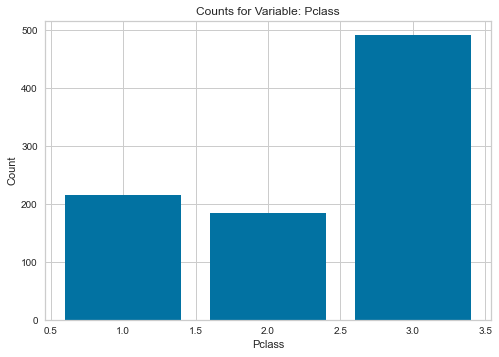

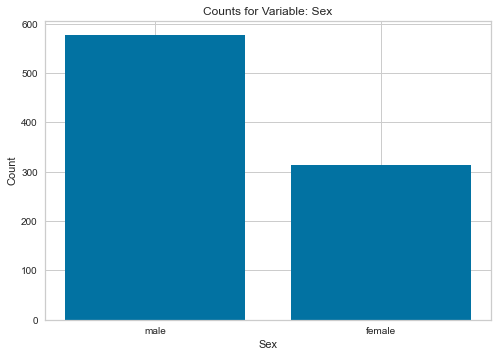

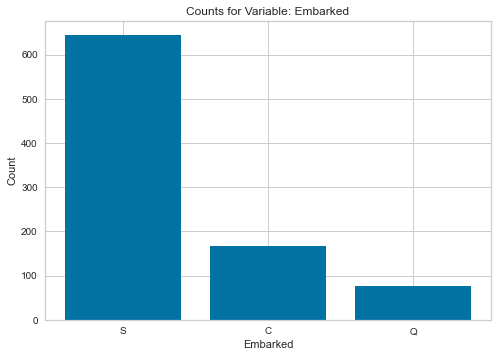

In [8]:
# I will use esentially the same technique, but use the labels and values from the value_counts() method.
# Create a list of categorical variables of interest.
cat_vars = ['Pclass', 'Sex', 'Embarked']

# Create a bar plot for each of the categorical variables of interest.
for cat in cat_vars:
    vc = titanic_raw[cat].value_counts()
    labels = list(vc.index)
    values = list(vc.values)
    plt.bar(x=labels, height=values)
    plt.title("Counts for Variable: {}".format(cat))
    plt.xlabel("{}".format(cat))
    plt.ylabel("Count")
    plt.show()

## 8. To see if the data is correlated, make some Pearson Ranking charts
### a. Notice that in my sample code, I have saved this png file.
### b. The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)  These results show there is “some” positive correlation but it’s not a high correlation.

In the past I have used matplotlib for most of my visualizations, but I thought I would follow along with the examples to try some alternate methods.  I also like the pandas corr() method for viewing correlations.

In [9]:
titanic_raw[num_vars].corr()

,Age,SibSp,Fare
Age,1.000000,-0.308247,0.096067
SibSp,-0.308247,1.000000,0.159651
Fare,0.096067,0.159651,1.000000


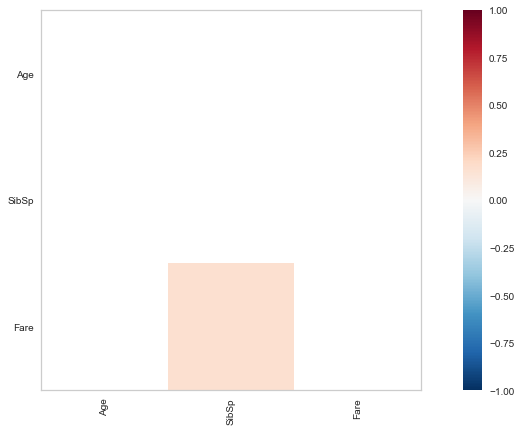

In [10]:
# Set plot parameters.
plt.rcParams['figure.figsize'] = (15, 7)
# extract the numpy arrays from the data frame
X = titanic_raw[num_vars].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_vars, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
# visualizer.poof(outpath="d://pcoords1.png") # Draw/show/poof the data
plt.show()

## 9. Use Parallel Coordinates visualization to compare the distributions of numerical variables between passengers that survived and those that did not survive.
### a. That’s a cool chart, isn’t it?!  Passengers traveling with siblings on the boat have a higher death rate and passengers who paid a higher fare had a higher survival rate.

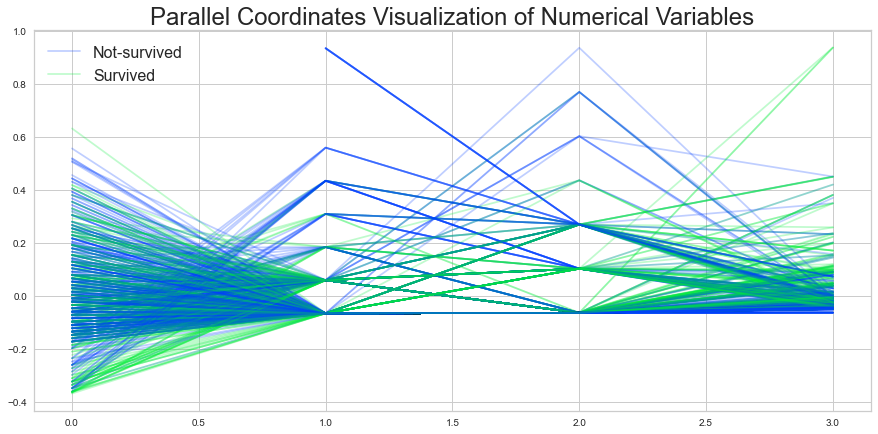

In [12]:
data = titanic_raw.copy()
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) -
                                                                              data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].to_numpy()
y = data.Survived.to_numpy()

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
plt.title("Parallel Coordinates Visualization of Numerical Variables", fontsize=24)
plt.legend(classes, fontsize=16)
plt.show()

## 10. Use Stack Bar Charts to compare passengers who survived to passengers who didn’t survive based on the other variables.
### a. More females survived than men.  3rd Class Tickets had a lower survival rate.  Also, Embarkation from Southampton port had a lower survival rate.

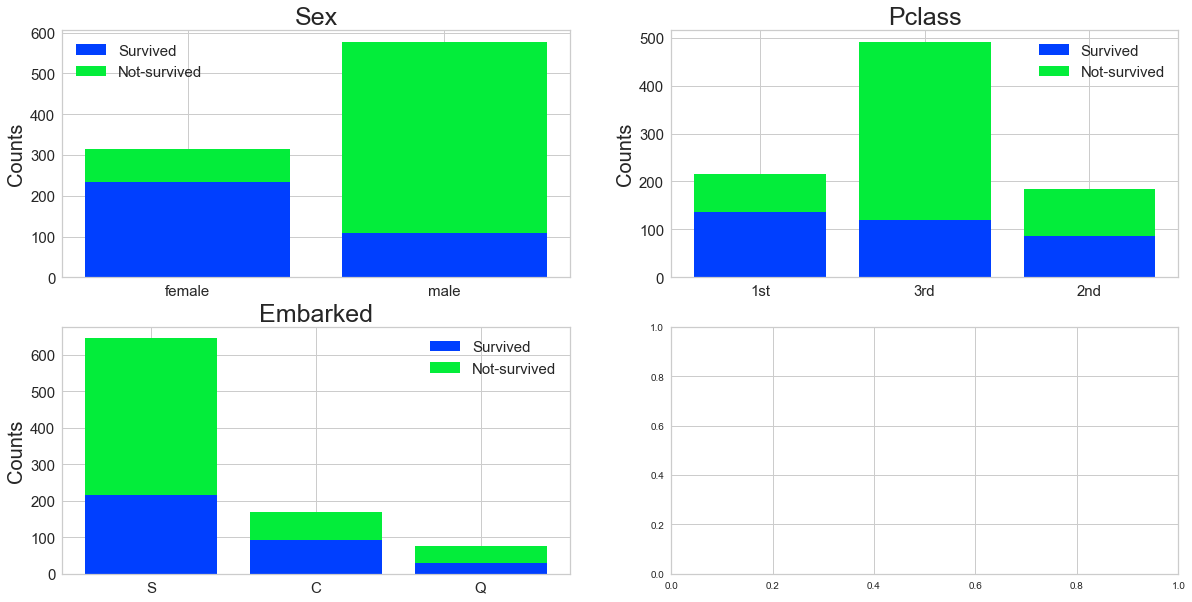

In [13]:
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
Sex_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Sex'].value_counts()
Sex_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Pclass_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Embarked_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
# make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)
plt.show()